# Chapter 2: Getting Started with Heat Diffusion

We start by examining a simple one dimensional heat diffusion equation. This problem provides a good starting example to build our knowledge of *escript* and demonstrate how to solve simple partial differential equations [(PDEs)](http://en.wikipedia.org/wiki/Partial_differential_equation), however their relevance to *escript* and implementation should become much clearer as we develop our understanding further into the tutorial.

## 2.1 Example 1: One Dimensional Heat Diffusion in Granite

The first model consists of two blocks of isotropic material, for instance granite, sitting next to each other (<font color=blue>Figure 2.1</font>). Initial temperature in *Block 1* is `T1` and in *Block 2* is `T2`. We assume that the system is insulated. What
would happen to the temperature distribution in each block over time? Intuition tells us that heat will be transported
from the hotter block to the cooler one until both blocks have the same temperature.


 <figure>
  <img src="figures/onedheatdiff001.svg">
  <figcaption>
    <center>
      Figure 2.1: Example 1: Temperature differential along a single interface between two granite blocks.
    </center>
  </figcaption>
 </figure>


### 2.1.1 1D Heat Diffusion Equation

We can model the heat distribution of this problem over time using the one dimensional heat diffusion equation which is defined as:

\begin{equation}
  \rho c_p \frac{\partial T}{\partial t} - \kappa \frac{\partial^{2}T}{\partial x^{2}} = q_H 
  \tag{2.1}
\end{equation}

where $\rho$ is the material density, $c_p$ is the specific heat and $\kappa$ is the thermal conductivity. Here we
assume that these material parameters are **constant**. The heat source is defined by the right hand side of Equation (2.1) as $q_H$; this can take the form of a constant or a function of time and space. For example $q_H = q_0e^{-\gamma t}$ where we have the output of our heat source decaying with time. There are also two partial derivatives in Equation (2.1); $\frac{\partial T}{\partial t}$ describes the change in temperature with time while $\frac{\partial ^2 T}{\partial x^2}$ is the spatial change of temperature. As there is only a single spatial dimension to our problem, our temperature solution $T$ is only dependent on the time $t$ and our signed distance from the block-block interface $x$.


### 2.1.2 PDEs and the General Form

It is possible to solve PDE Equation (2.1) analytically and obtain an exact solution to our problem. However, it is
not always practical to solve the problem this way. Alternatively, computers can be used to find the solution. To
do this, a numerical approach is required to discretise the PDE Equation (2.1) across time and space, this reduces
the problem to a finite number of equations for a finite number of spatial points and time steps. These parameters
together define the model. While discretisation introduces approximations and a degree of error, a sufficiently
sampled model is generally accurate enough to satisfy the accuracy requirements for the final solution.

Firstly, we discretise the PDE Equation (2.1) in time. This leaves us with a steady linear PDE which involves
spatial derivatives only and needs to be solved in each time step to progress in time. *escript* can help us here.

For time discretisation we use the Backward Euler approximation scheme. It is based on the approximation

\begin{equation}
  \frac{\partial T(t)}{\partial t} \approx \frac{T(t)-T(t-h)}{h}
  \tag{2.2}
\end{equation}

for  $\frac{\partial T}{\partial t}$  at time $t$ where $h$ is the time step size. This can also be written as

\begin{equation}
  \frac{\partial T}{\partial t}(t^{(n)}) \approx \frac{T^{(n)} - T^{(n-1)}}{h} ,
  \tag{2.3}
\end{equation}

where the upper index $n$ denotes the n<sup>th</sup> time step. So one has

\begin{equation}
  \begin{array}{rcl}
    t^{(n)} & = & t^{(n-1)}+h ,\\
    T^{(n)} & = & T(t^{(n-1)}) . \\ 
  \end{array}
  \tag{2.4}
\end{equation}

Substituting Equation (2.3) into Equation (2.1) we get

\begin{equation}
  \frac{\rho c_p}{h} (T^{(n)} - T^{(n-1)}) - \kappa \frac{\partial^{2}T^{(n)}}{\partial x^{2}} = q_H . 
  \tag{2.5}
\end{equation}

Notice that we evaluate the spatial derivative term at the current time $t^{(n)}$ - therefore the name **backward Euler** scheme. Alternatively, one can evaluate the spatial derivative term at the previous time $t^{(n-1)}$. This approach is called the **forward Euler** scheme. This scheme can provide some computational advantages, which are not discussed here. However, the **forward Euler** scheme has a major disadvantage. Namely, depending on the  material parameters as well as the domain discretization of the spatial derivative term, the time step size $h$ needs to be chosen sufficiently small to achieve a stable temperature when progressing in time. Stability is achieved if the temperature does not grow beyond its initial bounds and becomes non-physical. The backward Euler scheme, which we use here, is unconditionally stable meaning that under the assumption of a physically correct problem set-up the temperature approximation remains physical for all time steps. The user needs to keep in mind that the discretisation error introduced by Equation (2.2) is sufficiently small, thus a good approximation of the true temperature is computed. It is therefore very important that any results are viewed with caution. For example, one may compare the results for different time and spatial step sizes.

To get the temperature $T^{(n)}$ at time $t^{(n)}$ we need to solve the linear  differential equation Equation (2.5) which only includes spatial derivatives. To solve this problem we want to use *escript*.

In *escript* any given PDE can be described by the general form. For the purpose of this introduction we illustrate a simpler version of the general form for full linear PDEs which is available in the *escript* user's guide. A simplified form that suits our heat diffusion problemis is described by

\begin{equation}
  -\nabla\cdot(A\cdot\nabla u) + Du = f ,
  \tag{2.6}
\end{equation}

where $A$, $D$ and $f$ are known values and $u$ is the unknown solution. The symbol $\nabla$ which is called the *Nabla operator* or *del operator* represents the spatial derivative of its subject - in this case $u$. Lets assume for a moment that we deal with a one-dimensional problem then

\begin{equation}
  \nabla = \frac{\partial}{\partial x}
  \tag{2.7}
\end{equation}

and we can write Equation (2.6) as

\begin{equation}\label{eqn:commonform}
  -A\frac{\partial^{2}u}{\partial x^{2}} + Du = f
  \tag{2.8}
\end{equation}

if $A$ is constant. To match this simplified general form to our problem Equation (2.5) we rearrange Equation (2.5) as

\begin{equation}
  \frac{\rho c_p}{h} T^{(n)} - \kappa \frac{\partial^2 T^{(n)}}{\partial x^2} = q_H + \frac{\rho c_p}{h} T^{(n-1)} .
  \tag{2.9}
\end{equation}

The PDE is now in a form that satisfies Equation (2.6) which is required for *escript* to solve our PDE. This can be done by generating a solution for successive increments in the time nodes $t^{(n)}$ where $t^{(0)}=0$ and $t^{(n)}=t^{(n-1)}+h$, where $h>0$ is the step size and assumed to be constant. In the following the upper index ${(n)}$ refers to a value at time $t^{(n)}$. Finally, by comparing Equation (2.9) with Equation (2.8) one can see
that

\begin{equation}
  u=T^{(n)}; A = \kappa; D = \frac{\rho c_{p}}{h}; f = q_{H} + \frac{\rho c_p}{h} T^{(n-1)} .
  \tag{2.10}
\end{equation} 


### 2.1.2 Boundary Conditions

With the PDE sufficiently modified, consideration must now be given to the boundary conditions of our model. Typically there are two main types of boundary conditions known as **Neumann** and **Dirichlet** boundary
conditions, respectively. A **Dirichlet boundary condition** is conceptually simpler and is used to prescribe a known value to the unknown solution (in our example the temperature) on parts of the boundary or on the entire boundary of the region of interest. We discuss the Dirichlet boundary condition in our second example presented in
Section 2.2.

However, for this example we have made the model assumption that the system is insulated, so we need to add an appropriate boundary condition to prevent any loss or inflow of energy at the boundary of our domain. Mathematically this is expressed by prescribing the heat flux $\kappa \frac{\partial T}{\partial x}$ to zero. In our simplified
one dimensional model this is expressed in the form

\begin{equation}
  \kappa \frac{\partial T}{\partial x}  = 0 , 
  \tag{2.11}
\end{equation}

or in a more general case as

\begin{equation}
  \kappa \nabla T \cdot n  = 0 ,
  \tag{2.12}
\end{equation}

where $n$ is the outer normal field at the surface of the domain. The $\cdot$ (dot) refers to the dot product of the vectors $\nabla T$ and $n$. In fact, the term $\nabla T \cdot n$ is the normal derivative of  the temperature $T$. Other notations used here are

\begin{equation}
  \nabla T \cdot n  = \frac{\partial T}{\partial n} .
  \tag{2.13}
\end{equation}

A condition of the type Equation (2.12) defines a **Neumann boundary condition** for the PDE.

The PDE Equation (2.9) and the Neumann boundary condition (potentially together with the Dirichlet boundary conditions)  define a **boundary value problem**. It is the nature of a boundary value problem to allow making statements about the solution in the interior of the domain from information known on the boundary only. In most
cases we use the term partial differential equation but in fact it is a boundary value problem. It is important to keep in mind that boundary conditions need to be complete and consistent in the sense that at any point on the boundary either a Dirichlet or a Neumann boundary condition must be set.

Conveniently, *escript* makes a default assumption on the boundary conditions which the user may modify where appropriate. For a problem of the form in Equation (2.6) the default condition is

\begin{equation}
  -n\cdot A \cdot\nabla u = 0 , 
  \tag{2.14}
\end{equation}

which is used everywhere on the boundary. Again $n$ denotes the outer normal field. Notice that the coefficient $A$ is the same as in the *escript* PDE 2.6. With the settings for the coefficients we have already identified in
Equation (2.10) this condition translates into 

\begin{equation}
  \kappa \frac{\partial T}{\partial x} = 0 
  \tag{2.15}
\end{equation}

for the boundary of the domain. This is identical to the Neumann boundary condition we want to set. *escript* will take care of this condition for us. We discuss the Dirichlet boundary condition later.

### 2.1.4 Outline of the Implementation

To solve the heat diffusion equation (Equation (2.1)) we write a simple *python* script. At this point we assume that you have some basic understanding of the *python* programming language. If not, there are some pointers and links available in Section 1.4. The script (discussed in Section 2.1.7) has four major steps. Firstly, we need to define the domain where we want to calculate the temperature. For our problem this is the joint blocks of granite
which has a rectangular shape. Secondly, we need to define the PDE to solve in each time step to get the updated temperature. Thirdly, we need to define the coefficients of the PDE and finally we need to solve the PDE. The last two steps need to be repeated until the final time marker has been reached. The work flow is described in Figure (2.2).

<br>
<figure>
  <img src="figures/workflow.png" width="150">
  <figcaption>
    <center>Figure 2.2: Workflow for developing an escript model and solution.</center>
  </figcaption>
</figure> 
<br>

In the terminology of *python*, the domain and PDE are represented by **objects**. The nice feature of an object is
that it is defined by its usage and features rather than its actual representation. So we will create a domain object to describe the geometry of the two granite blocks. Then we define PDEs and spatially distributed values such as the temperature on this domain. Similarly, to define a PDE object we use the fact that one needs only to define the coefficients of the PDE and solve the PDE. The PDE object has advanced features, but these are not required in simple cases.

### 2.1.5 The Domain Constructor in *escript*

Whilst it is not strictly relevant or necessary, a better understanding of how values are spatially distributed (*e.g.* Temperature) and how PDE coefficients are interpreted in *escript* can be helpful.

There are various ways to construct domain objects. The simplest form is a rectangular shaped region with a length and height. There is a ready to use function for this named `rectangle()`. Besides the spatial dimensions this function requires to specify the number of elements or cells to be used along the length and height, see Figure (2.3). Any spatially distributed value and the PDE is represented in discrete form using this element representation. Therefore we will have access to an approximation of the true PDE solution only. The quality of the approximation depends - besides other factors - mainly on the number of elements being used. In fact, the  approximation becomes better when more elements are used. However, computational cost grows with the number of
elements being used. It is therefore important that you find the right balance between the demand in accuracy and acceptable resource usage.

<br>  
<figure>
  <img src="figures/functionspace.png" width="600">
  <figcaption>
    <center>Figure 2.3: <i>escript</i> domain construction overview.</center>
  </figcaption>
</figure> 
<br>  

In general, one can think about a domain object as a composition of nodes and elements. As shown in Figure (2.3), an element is defined by the nodes that are used to describe its vertices. To represent spatially distributed values the user can use the values at the nodes, at the elements in the interior of the domain or at the elements located on the surface of the domain. The different approach used to represent values is called **functionspace** and is attached to all objects in *escript* representing a spatially distributed value such as the solution of a PDE. The three function spaces we use at the moment are

  1. the nodes, called by `ContinuousFunction(domain)`;
  2. the elements/cells, called by `Function(domain)`; and
  3. the boundary, called by `FunctionOnBoundary(domain)`.

A function space object such as `ContinuousFunction(domain)` has the method `getX` attached to it. This method returns the location of the so-called **sample points** used to represent values of the particular function space. So the call `ContinuousFunction(domain).getX()` will return the coordinates of the nodes used to describe the domain while `Function(domain).getX()` returns the coordinates of numerical integration points within elements, see Figure (2.3). 

This distinction between different representations of spatially distributed values is important in order to be able to vary the degrees of smoothness in a PDE problem. The coefficients of a PDE do not need to be continuous, thus this qualifies as a `Function()` type. On the other hand a temperature distribution must be continuous and needs to be represented with a `ContinuousFunction()` function space. An influx may only be defined at the boundary and is therefore a `FunctionOnBoundary()` object. *escript* allows certain transformations of the function spaces. A
`ContinuousFunction()` can be transformed into a `FunctionOnBoundary()` or `Function()`. On the other hand there is
not enough information in a `FunctionOnBoundary()` to transform it to a `ContinuousFunction()`. These transformations, which are called **interpolation** are invoked automatically by *escript* if needed.

Later in this introduction we discuss how to define specific areas of geometry with different materials which are
represented by different material coefficients such as the thermal conductivities $\kappa$. A very powerful technique to define these types of PDE coefficients is tagging. Blocks of materials and boundaries can be named and
values can be defined on subregions based on their names. This is a method for simplifying PDE coefficient and flux definitions. It makes scripting much easier and we will discuss this technique in Section 4.1.

### 2.1.6 A Clarification for the 1D Case

It is necessary for clarification that we revisit our general PDE from equation (2.6) for a two dimensional domain. *escript* is inherently designed to solve problems that are multi-dimensional and so Equation (2.6) needs to be read as a higher dimensional problem. In the case of two spatial dimensions the *Nabla operator* has in fact two components $\nabla = (\frac{\partial}{\partial x}, \frac{\partial}{\partial y})$. Assuming the coefficient $A$ is constant, Equation (2.6) takes the following form

\begin{equation}
  -A_{00}\frac{\partial^{2}u}{\partial x^{2}} 
  -A_{01}\frac{\partial^{2}u}{\partial x\partial y} 
  -A_{10}\frac{\partial^{2}u}{\partial y\partial x} 
  -A_{11}\frac{\partial^{2}u}{\partial y^{2}} 
  + Du = f .
  \tag{2.16}
\end{equation}

Notice that for the higher dimensional case $A$ becomes a matrix. It is also important to notice that the usage of the Nabla operator creates a compact formulation which is also independent from the spatial dimension. To make the general PDE Equation (2.16) one dimensional as shown in Equation (2.8) we need to set

\begin{equation}
  A_{00}=A; A_{01}=A_{10}=A_{11}=0 .
  \tag{2.17}
\end{equation}



### 2.1.7 Developing a PDE Solution Script

**The scripts referenced in this section are; example01a.py**

We write a simple *python* script which uses the `esys.escript`, `esys.finley` and `matplotlib` modules. By developing a script for *escript*, the heat diffusion equation can be solved at successive time steps for a predefined period using our general form Equation (2.9). Firstly it is necessary to import all the libraries that we will require.

In [13]:
from esys.escript import *
# This defines the LinearPDE module as LinearPDE
from esys.escript.linearPDEs import LinearPDE
# This imports the rectangle domain function from finley.
from esys.finley import Rectangle
# A useful unit handling package which will make sure all our units
# match up in the equations under SI.
from esys.escript.unitsSI import *

It is generally a good idea to import all of the `esys.escript` library, although if the functions and classes required are known they can be specified individually. The function `LinearPDE` has been imported explicitly for
ease of use later in the script. `Rectangle` is going to be our type of domain. The module `unitsSI` provides support for SI unit definitions with our variables.

Once our library dependencies have been established, defining the problem specific variables is the next step. In general the number of variables needed will vary between problems. These variables belong to two categories. They are either directly related to the PDE and can be used as inputs into the *escript* solver, or they are script variables used to control internal functions and iterations in our problem. For this PDE there are a number of constants which need values. Firstly, the domain upon which we wish to solve our problem needs to be defined. There are different types of domains in `esys.escript` which we demonstrate in later tutorials but for our granite blocks, we simply use a rectangular domain. 

Using a rectangular domain simplifies our granite blocks (which would in reality be a *3D* object) into a single dimension. The granite blocks will have a lengthways cross section that looks like a rectangle. As a result we do not need to model the volume of the block due to symmetry. There are four arguments we must consider when we decide to create a rectangular domain, the domain *length*, *width* and *step size* in each direction. When defining the size of our problem it will help us determine appropriate values for our model arguments. If we make our dimensions large but our step sizes very small we increase the accuracy of our solution. Unfortunately we also increase the number of calculations that must be solved per time step. This means more computational time is required to produce a solution. In this *1D* problem, the bar is defined as being 1 metre long. An appropriate step size `ndx` would be 1 to 10\% of the length. Our `ndy` needs only be 1, this is because our problem stipulates no partial derivatives in the $y$ direction. Thus the temperature does not vary with $y$. Hence, the model parameters can be defined as follows; note we have used the `unitsSI` convention to make sure all our input units are converted to SI.

In [14]:
mx = 500.*m #meters - model length
my = 100.*m #meters - model width
ndx = 50 # mesh steps in x direction
ndy = 1 # mesh steps in y direction
boundloc = mx/2 # location of boundary between the two blocks

The material constants and the temperature variables must also be defined. For the granite in the model they are defined as:

In [15]:
#PDE related
rho = 2750. *kg/m**3 #kg/mˆ{3} density of iron
cp = 790.*J/(kg*K) # J/Kg.K thermal capacity
rhocp = rho*cp
kappa = 2.2*W/m/K
# watts/m.Kthermal conductivity
qH=0 * J/(sec*m**3) # J/(sec.mˆ{3}) no heat source
T1=20 * Celsius # initial temperature at Block 1
T2=2273. * Celsius # base temperature at Block 2

Finally, to control our script we will have to specify our timing controls and where we would like to save the output from the solver. This is simple enough:

In [16]:
t=0 * day # our start time, usually zero
tend=50 * yr # - time to end simulation
outputs = 200 # number of time steps required.
h=(tend-t)/outputs #size of time step
#user warning statement
print("Expected Number of time outputs is: ", (tend-t)/h)
i=0 #loop counter

Expected Number of time outputs is:  200.0


Now that we know our inputs we will build a domain using the `Rectangle()` function from *finley*. The four arguments allow us to define our domain `model` as:

In [17]:
#generate domain using rectangle
blocks = Rectangle(l0=mx,l1=my,n0=ndx, n1=ndy)

`blocks` now describes a domain in the manner of Section 2.1.5.

With a domain and all the required variables established, it is now possible to set up our PDE so that it can be solved by *escript*. The first step is to define the type of PDE that we are trying to solve in each time step. In this example it is a single linear PDE. We also need to state the values of our general form variables.

In [18]:
mypde=LinearPDE(blocks)
A=zeros((2,2))
A[0,0]=kappa
mypde.setValue(A=A, D=rhocp/h)

In many cases it may be possible to decrease the computational time of the solver if the PDE is symmetric.
Symmetry of a PDE is defined by

\begin{equation}
  A_{jl}=A_{lj}
  \tag{2.18}
\end{equation}

Symmetry is only dependent on the $A$ coefficient in the general form and the other coefficients $D$ as well as the right hand side $Y$. From the above definition we can see that our PDE is symmetric. The `LinearPDE` class
provides the method `checkSymmetry` to check if the given PDE is symmetric. As our PDE is symmetrical we enable symmetry via

In [19]:
mypde.setSymmetryOn()

Next we need to establish the initial temperature distribution `T`. We need to assign the value `T1` to all sample points left to the contact interface at $x_{0}=\frac{mx}{2}$ and the value `T2` right to the contact interface. *escript* provides the `whereNegative` function to construct this. More specifically, `whereNegative` returns the value $1$ at those sample points where the argument has a negative value. Otherwise zero is returned. If `x` are the $x_{0}$ coordinates of the sample points used to represent the temperature distribution 
then `x[0]-boundloc` gives us a negative value for all sample points left to the interface and non-negative value to the right of the interface. So with

In [20]:
# ... set initial temperature ....
x=Solution(blocks).getX()
T= T1*whereNegative(x[0]-boundloc)+T2*(1-whereNegative(x[0]-boundloc))

we get the desired temperature distribution. To get the actual sample points `x` we use the `getX()` method of the function space `Solution(blocks)` which is used to represent the solution of a PDE. As `x` are the sample points for the function space `Solution(blocks)` the initial temperature `T` is using these sample points for
representation.Although *escript* is trying to be forgiving with the choice of sample points and to convert
where necessary the adjustment of the function space is not always possible. So it is advisable to make a careful choice on the function space used.  

Finally we initialise an iteration loop to solve our PDE for all the time steps we specified in the variable section. As the right hand side of the general form is dependent on the previous values for temperature `T` across the bar this must be updated in the loop. Our output at each time step is `T` the heat distribution and `totT` the total heat in the system.

In [21]:
while t < tend:
    i+=1 #increment the counter 
    t+=h #increment the current time
    mypde.setValue(Y=qH+rhocp/h*T) # set variable PDE coefficients
    T=mypde.getSolution() #get the PDE solution
    totE = integrate(rhocp*T) #get the total heat (energy) in the system

The last statement in this script calculates the total energy in the system as the volume integral of $\rho c_{p} T$ over the block. As the blocks are insulated no energy should be lost or added. The total energy should stay constant for the example discussed here.

### 2.1.8 Running the Script

The script presented so far is available under `example01a.py`. You can edit this file with your favourite text editor. On most operating systems you can use the **`run-escript`** command to launch *escript* scripts. For the example script use

`run-escript example01a.py`

The program will print a progress report. Alternatively, you can use the python interpreter directly;

`python example01a.py`

if the system is configured correctly (please talk to your system administrator).

### 2.1.9 Plotting the Total Energy

**The scripts referenced in this section are: example01b.py**

*escript* does not include its own plotting capabilities. However, it is possible to use a variety of free *python* packages for visualisation. Two types will be demonstrated in this cookbook: `matplotlib` and `VTK`. The `matplotlib` package is a component of [SciPy](http://www.scipy.org) and is good for basic graphs and plots. For more complex visualisation tasks, in particular two and three dimensional problems we recommend the use of more advanced tools. For instance, [mayavi](http://code.enthought.com/projects/mayavi/) which is based upon the `VTK` toolkit. The usage of `VTK` based visualisation is discussed in Chapter 3.1 which focuses on a two
dimensional PDE. 

For our simple granite block problem, we have two plotting tasks. Firstly, we are interested in showing the
behaviour of the total energy over time and secondly, how the temperature distribution within the block is developing over time. Let us start with the first task.

The idea is to create a record of the time marks and the corresponding total energies observed. *python* provides the concept of lists for this. Before the time loop is opened we create empty lists for the time marks `t_list` and the total energies `E_list`. After the new temperature has been calculated by solving the PDE we append the new time marker and the total energy value for that time to the corresponding list using the `append` method. With these modifications our script looks as follows:

In [22]:
t_list=[]
E_list=[]
t=0
T= T1*whereNegative(x[0]-boundloc)+T2*(1-whereNegative(x[0]-boundloc))
# ... start iteration:
while t<tend:
    t+=h
    mypde.setValue(Y=qH+rhocp/h*T) # set variable PDE coefficients
    T=mypde.getSolution() #get the PDE solution
    totE=integrate(rhocp*T)
    t_list.append(t) # add current time mark to record 
    E_list.append(totE) # add current total energy to record

To plot $t$ over $totE$ we use `pylab`, a module contained within `matplotlib` which needs to be loaded before use:

In [23]:
# makes an interactive plotting window
%matplotlib notebook
import pylab as pl # plotting package.

Here we are not using `from pylab import *` in order to avoid name clashes for function names within *escript*. 

The following statements are added to the script after the time loop has been completed. The first statement hands over the time marks and corresponding total energies to the plotter. The second statement sets the title for the plot. The third statement sets the axis ranges. In most cases these are set appropriately by the plotter. The fourth and fifth statements set the x and y axis labels. The last statement generates the plot and shows it in a figure.

<IPython.core.display.Javascript object>


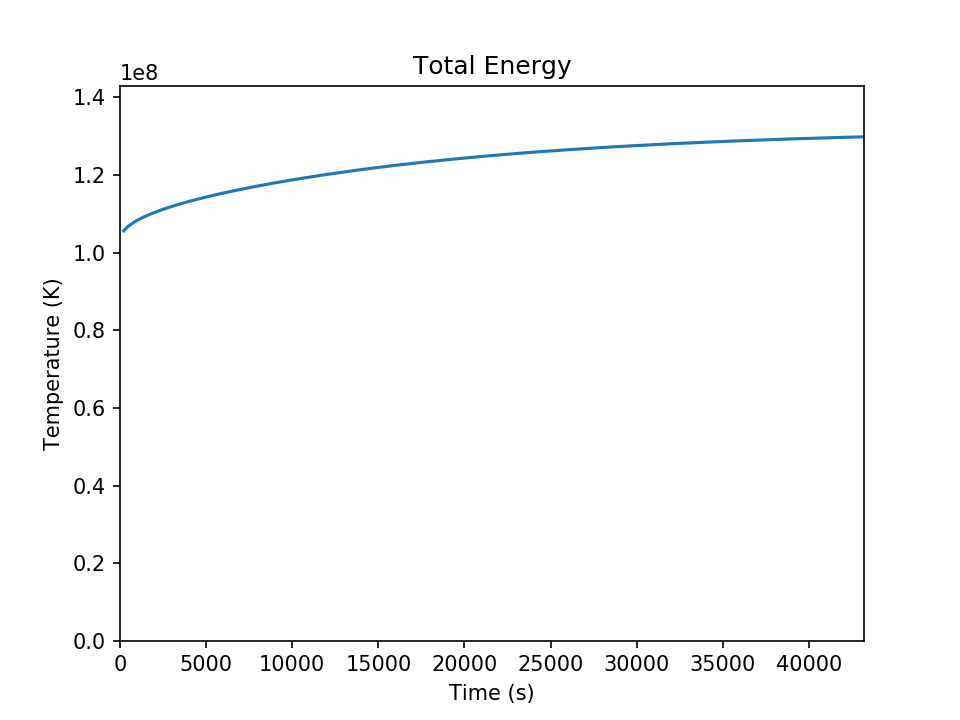

In [34]:
pl.figure(1)
pl.plot(t_list,E_list)
pl.title("Total Energy")
pl.axis([0,max(t_list),0,max(E_list)*1.1])
pl.xlabel("Time (s)")
pl.ylabel('Temperature (K)')
pl.show()

As expected the total energy is constant over time, see figure produced above.

### 2.1.10 Plotting the Temperature Distribution

**The scripts referenced in this section are: example01c.py**

For plotting the spatial distribution of the temperature we need to modify the strategy we have used for the total energy. Instead of producing a final plot at the end we will generate a picture at each time step which can be browsed as a slide show or composed into a movie. The first problem we encounter is that if we produce an image at each time step we need to make sure that the images previously generated are not overwritten.

To develop an incrementing file name we can use the following convention. It is convenient to put all image files showing the same variable - in our case the temperature distribution - into a separate directory. As part of the [`os` module](http://docs.python.org/library/os.html) *python* provides the `os.path.join` command to build file and directory names in a platform independent way. Firstly we define a string variable `save_path` pointing to the directory we want to save our data. For example a folder `data/example01/tempT` would be defined by:

In [25]:
import os
save_path = os.path.join("data","example01","tempT")
mkDir(save_path)

`mkDir(save_path)`is the sub-folder check/constructor that checks for the existence of `save_path` and if missing, create the required directories.

Prior to the `while` loop we need to extract our finite solution points to a data object that is compatible with `matplotlib`. First we create the node coordinates of the sample points used to represent the temperature as a *python* list of tuples or a `numpy` array as requested by the plotting function. We need to convert the array `x` previously set as `Solution(blocks).getX()` into a *python* list and then to a `numpy` array. The $x_{0}$ component is then extracted via an array slice to the variable `plx`: 

In [26]:
import numpy as np # array package.
#convert solution points for plotting
plx = x.toListOfTuples()
plx = np.array(plx) # convert tuple to numpy array
plx = plx[:,0] # extract x locations

We use the same techniques provided by `matplotlib` as we have used to plot the total energy over time. For each time step we generate a plot of the temperature distribution and save each to a file. The following is appended to the end of the `while` loop and creates one figure of the temperature distribution. We start by converting the solution to a tuple and then plotting this against our *x coordinates* `plx` we have generated before. We add a title to the diagram before it is rendered into a file. Finally, the figure is saved to a `*.png` file and cleared for the following iteration:

In [27]:
%matplotlib inline
import pylab as pl

i=0
t=0
T= T1*whereNegative(x[0]-boundloc)+T2*(1-whereNegative(x[0]-boundloc))
# ... start iteration:
pl.figure(2)
while t<tend:
    i+=1
    t+=h
    mypde.setValue(Y=qH+rhocp/h*T)
    T=mypde.getSolution()
    print("time step %s at t=%e days completed."%(i,t/day))
    #establish figure 1 for temperature vs x plots
    tempT = T.toListOfTuples()
    pl.plot(plx,tempT) #plot solution
    # add title
    pl.axis([0,mx,T1*.9,T2*1.1])
    pl.title("Temperature across blocks at time %d days"%(t/day))
    pl.ylabel('Temperature (K)')
    pl.xlabel("Length (m)")    
    #save figure to file
    pl.savefig(os.path.join(save_path, "blockspyplot%03d.png"%i))
    pl.clf() #clear figure
    

time step 1 at t=9.131063e+01 days completed.
time step 2 at t=1.826213e+02 days completed.
time step 3 at t=2.739319e+02 days completed.
time step 4 at t=3.652425e+02 days completed.
time step 5 at t=4.565531e+02 days completed.
time step 6 at t=5.478637e+02 days completed.
time step 7 at t=6.391744e+02 days completed.
time step 8 at t=7.304850e+02 days completed.
time step 9 at t=8.217956e+02 days completed.
time step 10 at t=9.131063e+02 days completed.
time step 11 at t=1.004417e+03 days completed.
time step 12 at t=1.095727e+03 days completed.
time step 13 at t=1.187038e+03 days completed.
time step 14 at t=1.278349e+03 days completed.
time step 15 at t=1.369659e+03 days completed.
time step 16 at t=1.460970e+03 days completed.
time step 17 at t=1.552281e+03 days completed.
time step 18 at t=1.643591e+03 days completed.
time step 19 at t=1.734902e+03 days completed.
time step 20 at t=1.826213e+03 days completed.
time step 21 at t=1.917523e+03 days completed.
time step 22 at t=2.00

time step 174 at t=1.588805e+04 days completed.
time step 175 at t=1.597936e+04 days completed.
time step 176 at t=1.607067e+04 days completed.
time step 177 at t=1.616198e+04 days completed.
time step 178 at t=1.625329e+04 days completed.
time step 179 at t=1.634460e+04 days completed.
time step 180 at t=1.643591e+04 days completed.
time step 181 at t=1.652722e+04 days completed.
time step 182 at t=1.661853e+04 days completed.
time step 183 at t=1.670984e+04 days completed.
time step 184 at t=1.680115e+04 days completed.
time step 185 at t=1.689247e+04 days completed.
time step 186 at t=1.698378e+04 days completed.
time step 187 at t=1.707509e+04 days completed.
time step 188 at t=1.716640e+04 days completed.
time step 189 at t=1.725771e+04 days completed.
time step 190 at t=1.734902e+04 days completed.
time step 191 at t=1.744033e+04 days completed.
time step 192 at t=1.753164e+04 days completed.
time step 193 at t=1.762295e+04 days completed.
time step 194 at t=1.771426e+04 days com

The second argument of `join` contains a string which is the file name. We use the operator `%` to represent the value of `i` as part of our filename. The sub-string `%03d` indicates that we want to substitute a value into the name:

 - `0`  means that small numbers should have leading zeroes;
 - `3`  means that numbers should be written using at least 3 digits; and
 - `d`  means that the value to substitute will be a decimal integer.

When done correctly, the output files from this command will be placed in the directory defined by `save_path`  as:

`blockspyplot001.png`
`blockspyplot002.png`
`blockspyplot003.png`
... and so on.

Some results are shown in Figure (2.4).

<br>  
<figure>
  <img src="figures/blockspyplot001.png" width="400">
  <img src="figures/blockspyplot050.png" width="400">
  <img src="figures/blockspyplot200.png" width="400">
  <figcaption>
    <center>
      Figure 2.4: Example 1c: Temperature (T) distribution in the blocks at time steps 1, 50 and 200.
    </center>
  </figcaption>
</figure> 
<br> 

### 2.1.11 Making a Video

Our saved plots from the previous section can be cast into a video using the following command. The `mencoder` command is not available on every platform, so some users need to use an alternative video encoder.

In [28]:
# compile the *.png files to create a *.avi video that shows T change
# with time. This operation uses Linux mencoder. For other operating
# systems it is possible to use your favourite video compiler to
# convert image files to videos.

os.system("mencoder mf://"+save_path+"/*.png -mf type=png:\
w=800:h=600:fps=25 -ovc lavc -lavcopts vcodec=mpeg4 -oac copy -o \
example01tempT.avi")

32512

## 2.2 Example 2: One Dimensional Heat Diffusion in an Iron Rod

**The scripts referenced in this section are: example02.py**

Our second example is of a cold iron bar at a constant temperature of $T_{ref}=20^{\circ} C$, see Figure 2.5. The bar is perfectly insulated on all sides with a heating element at one end keeping the temperature at a constant level $T_0=100^{\circ} C$. As heat is applied energy will disperse along the bar via conduction. With time the bar will reach a constant temperature equivalent to that of the heat source...

<br>
 <figure>
  <img src="figures/onedheatdiff002.svg">
  <figcaption>
    <center>
      Figure 2.5: Example 2: One dimensional model of an Iron bar.
    </center>
  </figcaption>
</figure>
<br>

This problem is very similar to the example of temperature diffusion in granite blocks presented in the previous Section 2.1. Thus, it is possible to modify the script we have already developed for the granite blocks to suit
the iron bar problem. The obvious differences between the two problems are the dimensions of the
domain and different materials involved. This will change the time scale of the
model from years to hours. The new settings are:

In [29]:
##Domain related.
mx = 1*m #meters - model length
my = .1*m #meters - model width
ndx = 100 # mesh steps in x direction
ndy = 1 # mesh steps in y direction - one dimension means one element
##PDE related
rho = 7874. *kg/m**3 #kg/mˆ{3} density of iron
cp = 449.*J/(kg*K) # J/Kg.K thermal capacity
rhocp = rho*cp
kappa = 80.*W/m/K # watts/m.Kthermal conductivity
qH = 0 * J/(sec*m**3) # J/(sec.mˆ{3}) no heat source
Tref = 20 * Celsius # base temperature of the rod
T0 = 100 * Celsius # temperature at heating element
##Parameters
t=0 * day  # our start time, usually zero
tend= 0.5 *day  # - time to end simulation
outputs = 200 # number of time steps required.
h=(tend-t)/outputs #size of time step
#user warning statement
print("Expected Number of time outputs is: ", (tend-t)/h)
i=0 #loop counter
##Save path 
save_path= os.path.join("data","example02")
#ensure the dir exists
mkDir(save_path, os.path.join(save_path,"tempT"))
##Domain construction
rod = Rectangle(l0=mx,l1=my,n0=ndx, n1=ndy)
x=Solution(rod).getX()

Expected Number of time outputs is:  200.0


We also need to alter the initial value for the temperature. Now we need to set the temperature to $T_{0}$ at the left end of the rod where we have $x_{0}=0$ and $T_{ref}$ elsewhere. Instead of `whereNegative` function we now use `whereZero` which returns the value one for those sample points where the argument (almost) equals zero and the value zero elsewhere. The initial temperature is set to:

In [30]:
# ... set initial temperature ....
T= T0*whereZero(x[0])+Tref*(1-whereZero(x[0]))

### 2.2.1 Dirichlet Boundary Conditions

In the iron rod model we want to keep the initial temperature $T_0$ on the left side of the domain constant with time.  This implies that when we solve the PDE Equation (2.5), the solution must have the value $T_0$ on the left hand side of the domain. As mentioned already in Section 2.1.3 where we discussed boundary conditions, this kind of scenario can be expressed using a `Dirichlet boundary condition`. Some people also use the term `constraint` for the PDE. 

To define a Dirichlet boundary condition we need to specify where to apply the condition and determine what value the solution should have at these locations. In *escript* we use $q$ and $r$ to define the Dirichlet boundary conditions for a PDE. The solution $u$ of the PDE is set to $r$ for all sample points where $q$ has a positive value. Mathematically this is expressed in the form:

\begin{equation}
  u(x) = r(x) \mbox{ for any } x \mbox{ with } q(x) > 0
\end{equation} 

In the case of the iron rod we can set the following to prescribe the value $T_{0}$ for the temperature at the left end of the rod where $x_{0}=0$.

In [31]:
q=whereZero(x[0])
r=T0

Here we use the `whereZero` function again which we have already used to set the initial value. Notice that $r$ is set to the constant value $T_{0}$ for all sample points. In fact, values of $r$ are used only where $q$ is positive. Where $q$ is non-positive, $r$ may have any value as these values are not used by the PDE solver. 

To set the Dirichlet boundary conditions for the PDE to be solved in each time step we need to add some statements:

In [32]:
mypde=LinearPDE(rod)
A=zeros((2,2))
A[0,0]=kappa
q=whereZero(x[0])
mypde.setValue(A=A, D=rhocp/h, q=q, r=T0)

It is important to remark here that if a Dirichlet boundary condition is prescribed on the same location as any Neumann boundary condition, the Neumann boundary condition will be **overwritten**. This applies to Neumann boundary conditions that *escript* sets by default and those defined by the user.

Now we can run following code to simulate the hear diffusion process and plot the results.

Simulation started, please wait...


<IPython.core.display.Javascript object>


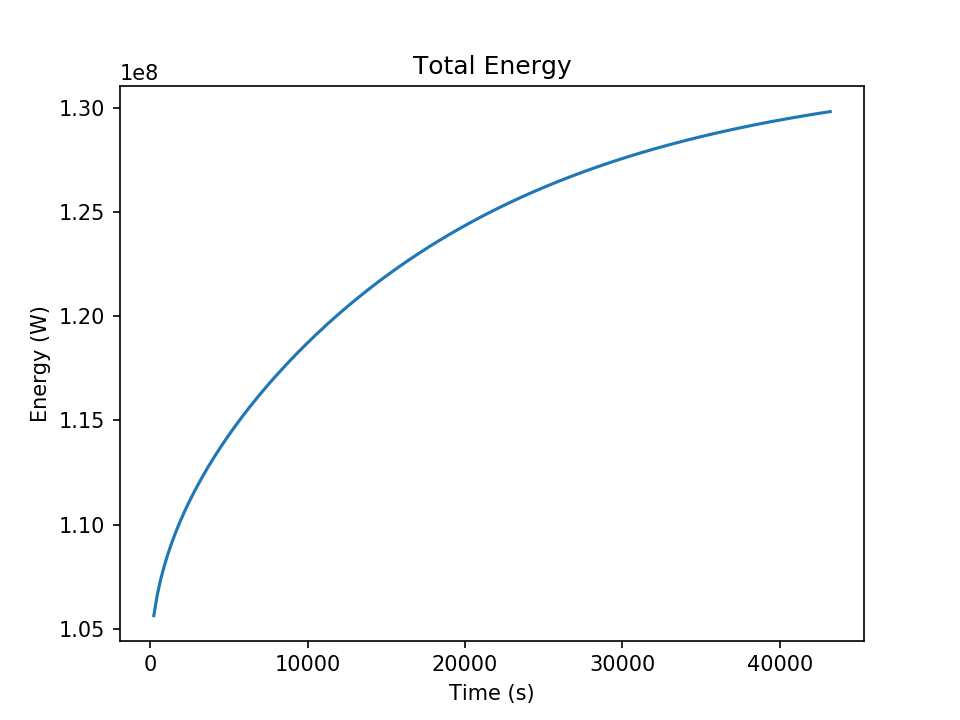

Simulation completed.


In [33]:
# ... open a collector for the time marks and corresponding total energy
t_list=[]
E_list=[]
# ... convert solution points for plotting
plx = x.toListOfTuples() 
plx = np.array(plx) #convert tuple to numpy array
plx = plx[:,0] #extract x locations
########################################################START ITERATION
print("Simulation started, please wait...")
t=0 * day
while t<tend:
    i+=1
    t+=h
    mypde.setValue(Y=qH+rhocp/h*T)
    T=mypde.getSolution()
    totE=integrate(rhocp*T)
    #print("time step %s at t=%e minutes completed. total energy = %e."%(i,t/minute,totE))
    t_list.append(t)
    E_list.append(totE)

    #establish figure 1 for temperature vs x plots
    tempT = T.toListOfTuples()
    pl.figure(3) #current figure
    pl.plot(plx,tempT) #plot solution
    # add title
    pl.axis([0,mx,Tref*.9,T0*1.1])
    pl.ylabel('Temperature (K)')
    pl.xlabel("Length (m)")
    pl.title("Temperature across rod at time %e hours"%(t/hour))
    #save figure to file
    pl.savefig(os.path.join(save_path,"tempT", "rodpyplot%03d.png"%i))
    pl.clf() #clear figure

%matplotlib notebook
import pylab as pl    
# plot the total energy over time:
pl.figure(3)
pl.plot(t_list,E_list)
pl.title("Total Energy")
pl.ylabel('Energy (W)')
pl.xlabel('Time (s)')
# pl.axis([0,max(t_list),0,max(E_list)*1.1])
pl.savefig(os.path.join(save_path,"totE.png"))
pl.show()
print("Simulation completed.")

The total energy over time is shown in above figure. As heat is transferred into the rod by the heater the total energy is growing over time but reaches a plateau when the temperature is constant in the rod, see Figure (2.8). You will notice that the time scale of this model is several order of magnitudes faster than for the granite rock problem due to the different length scale and material parameters. In practice it can take a few model runs before the right time scale has been chosen. An estimate of the time scale for a diffusion problem is given by the formula $\frac{\rho c_{p} L_{0}^2}{4 \kappa}$, see [reference](http://en.wikipedia.org/wiki/Fick\%27s_laws_of_diffusion).

<br>
 <figure>
  <img src="figures/rodpyplot001.png" width="400">
 </figure>

 <figure>
  <img src="figures/rodpyplot050.png" width="400">
 </figure>

 <figure>
  <img src="figures/rodpyplot200.png" width="400">
 </figure>

 <figure>
  <img src="figures/rodpyplot400.png" width="400">
  <figcaption>
    <center>
      Figure 2.8: Example 2: Temperature ($T$) distribution in the iron rod at time steps
$1$, $50$ and $200$.
    </center>
  </figcaption>
 </figure>
<br>

## 2.3 Exercise

1. Move the boundary line between the two granite blocks to another part of the domain.
2. Split the domain into multiple granite blocks with varying temperatures.
3. Vary the mesh step size. Do you see a difference in the answers? What does happen with the compute time?
4. Insert an internal heat source (Hint: The internal heat source is given by $q_{H}$.)
5. Change the boundary condition for the iron rod example such that the temperature at the right end is kept at a constant level $T_{ref}$, which corresponds to the installation of a cooling element (Hint: Modify $q$ and
$r$).